In [1]:
import numpy as np

from basepolygon_class import GoalPolygon
from shapely.geometry import Polygon
place = GoalPolygon('Жилой комплекс "Жулебино Парк" стройка')
v = place.polygon

/Users/andrewastakhov/opt/anaconda3/envs/work/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/andrewastakhov/opt/anaconda3/envs/work/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/andrewastakhov/opt/anaconda3/envs/work/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


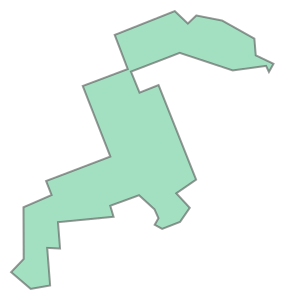

In [165]:
from shapely.affinity import translate

s = v.simplify(8, preserve_topology=True)
x, y, _, _ = v.bounds
st = translate(s, 1-x, 1-y)

st

In [166]:
# убрать бы эту ебань
coor_list = (list(st.boundary.coords[0:len(st.boundary.coords) - 1]))
coor_list


[(1.0, 43.42240105941892),
 (50.646892975317314, 1.0),
 (99.84738645789912, 9.644872757606208),
 (92.4870680613094, 104.90478569734842),
 (124.99432792240987, 103.31525947432965),
 (119.84098943317076, 170.09848177898675),
 (260.5926219234825, 183.74853624869138),
 (252.26317001710413, 211.77966740820557),
 (325.2408816458192, 238.37195728812367),
 (364.47268786811037, 202.54586718510836),
 (374.429630770348, 180.15426537487656),
 (364.9113453243044, 163.49007819592953),
 (383.8016503081308, 153.13047074340284),
 (429.13861587963765, 170.7247769329697),
 (453.75512537162285, 206.44482689723372),
 (419.62160929798847, 243.2890095654875),
 (469.869841001404, 277.86797133646905),
 (374.6430417126394, 517.6187753705308),
 (326.4972854232765, 498.4457708345726),
 (304.76772698637797, 551.6964679146186),
 (428.32105774397496, 599.1822010865435),
 (562.7782090922119, 554.6829920513555),
 (647.1450598833617, 566.1904505407438),
 (654.4299570668372, 550.7999624321237),
 (665.9604775389307, 571.

In [207]:
np.roll(np.asarray(coor_list), -1, axis=0)-np.asarray(coor_list)

array([[  49.64689298,  -42.42240106],
       [  49.20049348,    8.64487276],
       [  -7.3603184 ,   95.25991294],
       [  32.50725986,   -1.58952622],
       [  -5.15333849,   66.7832223 ],
       [ 140.75163249,   13.65005447],
       [  -8.32945191,   28.03113116],
       [  72.97771163,   26.59228988],
       [  39.23180622,  -35.8260901 ],
       [   9.9569429 ,  -22.39160181],
       [  -9.51828545,  -16.66418718],
       [  18.89030498,  -10.35960745],
       [  45.33696557,   17.59430619],
       [  24.61650949,   35.72004996],
       [ -34.13351607,   36.84418267],
       [  50.2482317 ,   34.57896177],
       [ -95.22679929,  239.75080403],
       [ -48.14575629,  -19.17300454],
       [ -21.72955844,   53.25069708],
       [ 123.55333076,   47.48573317],
       [ 134.45715135,  -44.49920904],
       [  84.36685079,   11.50745849],
       [   7.28489718,  -15.39048811],
       [  11.53052047,   20.62823536],
       [ -44.94710006,   21.55692532],
       [  -3.43933599,   

In [178]:
import torch
import torch.nn as nn
cor_tens = torch.tensor(coor_list)


csn = nn.CosineSimilarity()

In [189]:
n = nn.Conv1d(len(coor_list), len(coor_list), 2, stride=2, padding=0)

In [190]:
out = csn(cor_tens)

TypeError: forward() missing 1 required positional argument: 'x2'

In [191]:
output = n(cor_tens)

In [192]:
output, output.shape

(tensor([[ 327.1912],
         [ 369.4582],
         [  85.2243],
         [ 157.1396],
         [ 116.9448],
         [ 285.8655],
         [  41.2113],
         [-201.0971],
         [-160.7157],
         [  62.0848],
         [ 229.1441],
         [ 260.0822],
         [-402.8832],
         [-273.7845],
         [ 248.8812],
         [ 243.7940],
         [-156.8132],
         [ 386.4939],
         [ 223.6838],
         [-426.9040],
         [-178.2803],
         [ 281.7833],
         [-349.3435],
         [  53.5385],
         [ 194.3497],
         [-150.9666],
         [ -71.7279],
         [ 401.1965],
         [-118.2823],
         [ -21.6016],
         [  13.5021],
         [  15.1641],
         [ 440.7418],
         [ -62.7915],
         [-225.4162],
         [-347.4238],
         [ 192.7262],
         [ 185.4097],
         [ 383.8250]], grad_fn=<SqueezeBackward1>),
 torch.Size([39, 1]))

In [199]:
npout=output.detach().numpy()
npout.T[0,:].shape

(39,)

In [158]:
import plotly.graph_objects as go
from operator import neg
fig = go.Figure(go.Surface(
    x = np.linspace(-1, 0, num=output.shape[1]),

    y = np.linspace(-1, 0, num=output.shape[1]),

    z = npout,
    ),
    layout=go.Layout(
        width=1200,
        height=700)
)
fig.update_layout(
        template= "simple_white",

        scene = {
            "xaxis": {"nticks": 10},
            "zaxis": {"nticks": 10},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.2}

        })

In [203]:
import plotly.express as px
import numpy as np
nparr=output.detach().numpy()

zstub = np.zeros(npout.T[0,:].shape)
fig = px.scatter_3d(x= np.asarray(coor_list)[:,0], y=np.asarray(coor_list)[:,1], z=zstub, color=npout.T[0,:])
fig.show()

In [202]:
output[0]

tensor([327.1912], grad_fn=<SelectBackward0>)